# Exploratory Data Analysis


pada bagian ini dilakukan tahapan explorasi data untuk memahami karakteristik data, struktur, pola yang terdapat dalam data.

In [1]:
# beberapa library dasar untuk melakukan explorasi data
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re, os

## Read and Exploration

mengambil sampel data dan memahami karakteristik data

In [7]:
data = pd.read_csv('../data/raw.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20895 entries, 0 to 20894
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             20895 non-null  object
 1   username            20895 non-null  object
 2   tweet_published_at  20895 non-null  object
 3   type                20895 non-null  object
dtypes: object(4)
memory usage: 653.1+ KB


In [6]:
data.head()

,content,username,tweet_published_at,type
0,ini serius Coldplay mau konser di Indo?,fahmiach_,2023-05-02 06:43:55+07,tweet
1,Gak sabar nonton coldplay 🥹🥲 @woootamelon semo...,LSuroyaa,2023-05-02 06:42:14+07,tweet
2,"Kayak 50% masih nangisin ten, 25% kepikiran tx...",chittenyawn,2023-05-02 06:29:04+07,tweet
3,Trus apa Coldplay ngerasa dia plagiat? Enggak....,lacvnna,2023-05-02 06:16:23+07,replied_to
4,coldplay ke indonesia cmn 1x yang mo b nntn kr...,rialdi_achmad,2023-05-11 19:36:52+07,tweet


In [8]:
# mengambil sampel unique dari attribut type
data['type'].unique()

array(['tweet', 'replied_to', 'retweet'], dtype=object)

dari hasil tersebut kita dapat melihat bahwa `20895` baris data tanpa adanya missing value dan terdapat 4 attribut, diantaranya :
- `content` -> isi content suatu tweet 
- `username` -> nama pengguna pembuat tweet
- `tweet_published_at` -> kapan tweet tersebut diposting
- `type` -> jenis tweet tersebut apakah murni tweet, atau sebuah tweet untuk menanggapi tweet lain, dan retweet dimana seorang pengguna memposting ulang suatu tweet

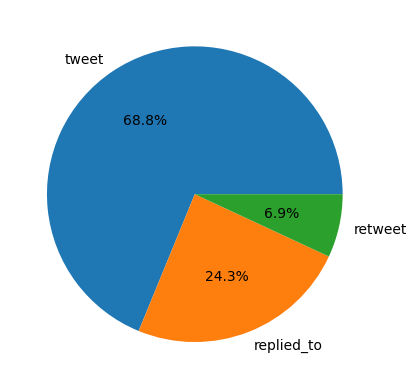

In [9]:
chart_labels = data['type'].unique()
chart_size = [len(data[data['type'] == key]) for key in chart_labels]

fig, ax = plt.subplots()
ax.pie(chart_size, labels=chart_labels, autopct='%1.1f%%')
plt.show()

mencoba mengambil perbandingan jumlah data berdasarkan attribut type pada data. Dari pie chart tersebut terlihat bahwa mayoritas dari tweet tersebut merupakan tweet murni.

### Memfilter data berdasarkan tweet yang mengandung mention

In [10]:
data_mention_only = data[data['content'].apply(lambda x: len(re.findall(r'(\@\w+)', x)) > 0)]
data_mention_only

,content,username,tweet_published_at,type
1,Gak sabar nonton coldplay 🥹🥲 @woootamelon semo...,LSuroyaa,2023-05-02 06:42:14+07,tweet
25,@jn_jiu @mistamosby Ga suka coldplay 😭😭😭,COMRADE_SOLAR,2023-05-04 00:07:38+07,replied_to
29,"Huhu ada lagiii, HALOOO @coldplay https://t.co...",bekstreettt,2023-05-05 12:46:14+07,replied_to
33,Salah satu tanda @coldplay ke Indonesia untuk ...,SeleccionINA,2023-05-07 10:42:19+07,tweet
38,@IDWantsColdplay @coldplay Bismillah menang wa...,finyjr,2023-05-08 23:02:38+07,replied_to
...,...,...,...,...
20877,@0tk0il man666 ots kenapa yah aku kalo denger ...,perdott_,2023-05-11 00:55:10+07,replied_to
20880,@kegblgnunfaedh Yakali ngga coldplay\n\nhttps:...,Ruangtummbuh,2023-05-11 00:54:42+07,replied_to
20883,@yfurip Beliin gue tiket coldplay buruan!!,titislukita,2023-05-11 00:53:05+07,replied_to
20884,"@0tk0il wkwk menurut gue coldplay juga b aja, ...",Dwiky_Alfi,2023-05-11 00:52:51+07,replied_to


setelah melakukan filter data untuk menampilkan data tweet yang mengandung mention didapati ternyata hanya ada `5435` baris data dari `20895` data sebelumnya

In [11]:
data_mention_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5435 entries, 1 to 20894
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             5435 non-null   object
 1   username            5435 non-null   object
 2   tweet_published_at  5435 non-null   object
 3   type                5435 non-null   object
dtypes: object(4)
memory usage: 212.3+ KB


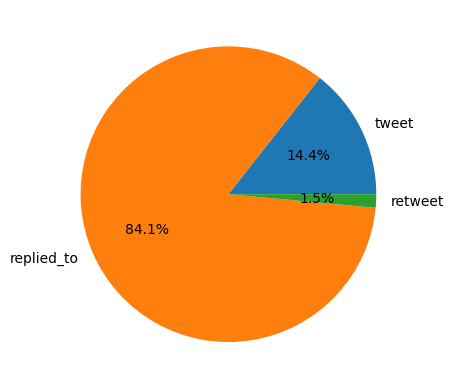

In [12]:
chart_labels = data_mention_only['type'].unique()
chart_size = [len(data_mention_only[data_mention_only['type'] == key]) for key in chart_labels]

fig, ax = plt.subplots()
ax.pie(chart_size, labels=chart_labels, autopct='%1.1f%%')
plt.show()

setelah dilakukan plotting menggunakan pie chart lagi terlihat bahwa sekarang mayoritas data berada pada jenis tweet `replied_to`. Dengan hanya mengambil data yang mengandung mention dapat mempercepat proses analisa jaringan sosial (SNA). karena tweet yang tidak melakukan mention terhadap pengguna lain dianggap sebagai komunikasi 1 arah, sedangkan dengan melakukan mention kita dapat berasumsi bahwa komunikasi yang dilakukan komunikasi 2 arah.

### User dengan tweet paling banyak
mencoba mengambil data pengguna yang memiliki postingan terbanyak, dengan cara melakukan grouping data berdasarkan nama pengguna (username).

In [13]:
count_tweets = []
for username, data_group in data.groupby(by='username'):
  count_tweets.append((username, len(data_group)))
count_tweets = pd.DataFrame(count_tweets, columns=['username', 'count'])

In [14]:
data_count_tweets = count_tweets.sort_values(by='count', ascending=False)[:10]

In [15]:
data_count_tweets

,username,count
14463,tixseoulution,61
8670,jastiparfazah,39
15126,westenthu,35
1219,IDWantsColdplay,28
9233,kimminjqi,28
14541,tribunpontianak,26
15678,yukhematbareng,22
2063,Puspitaaaa__,21
4163,awloola,20
8297,infobaranglucuk,20


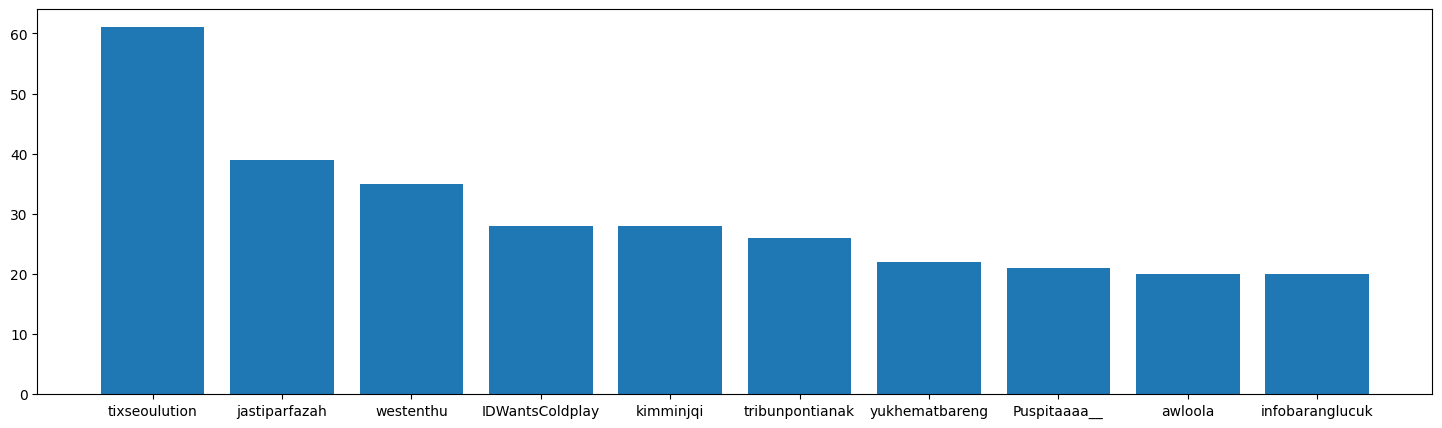

In [16]:
chart_labels = data_count_tweets['username'].to_numpy()
chart_size = data_count_tweets['count'].to_numpy()

plt.figure(figsize=(18,5))
plt.bar(chart_labels, chart_size)
plt.show()

### Mengelompokan data berdasarkan tanggal
karena terdapat attribut waktu, mari kita mencoba mengelompokan data berdasarkan bulan dan tahun untukmelihat persebaran tweet dilakukan di bulan apa.

In [17]:
data_bydate = data['tweet_published_at'].apply(lambda x: f"{dt.datetime.fromisoformat(x).date().year}-{dt.datetime.fromisoformat(x).date().month}")

In [18]:
data_bydate.unique()

array(['2023-5', '2023-4', '2023-3', '2023-6', '2021-7', '2022-10',
       '2022-11', '2012-8', '2022-12', '2023-2', '2023-1', '2022-8',
       '2022-4', '2022-7', '2021-5', '2022-3', '2010-12', '2020-1',
       '2020-2', '2017-5', '2022-9', '2020-11', '2019-3', '2019-9'],
      dtype=object)

dari sini terlihat bahwa data ternyata ada selain di Q2 tahun 2023. mencoba mengambil data yang hanya berada di tahun 2023

In [19]:
data_bydate = data_bydate[data_bydate.apply(lambda x: len(re.findall(r'2023-\w+',x)) > 0)]
chart_labels = data_bydate.apply(lambda x: str(x)).unique()
chart_size = [len(data_bydate[data_bydate == x]) for x in chart_labels]

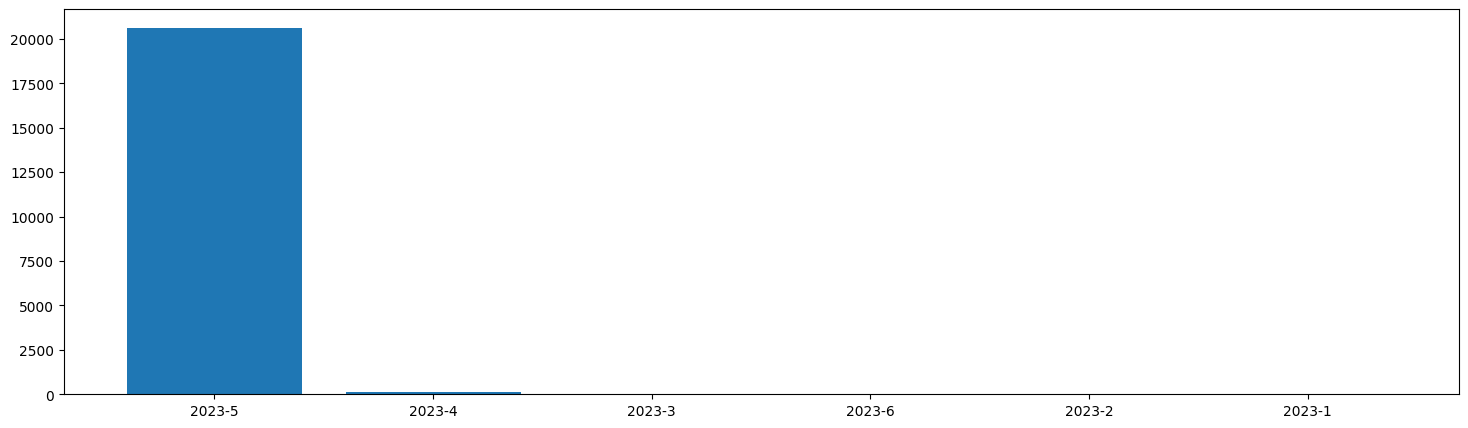

In [20]:
plt.figure(figsize=(18,5))
plt.bar(chart_labels, chart_size)
plt.show()

### Feature Extraction
dari eksplorasi yang dilakukan diputuskan untuk mengambil data yang yang merupakan data tweet yang berada di tahun 2023 dan tweet yang mengandung mention pada contentnya.

In [21]:
data['date'] = data['tweet_published_at'].apply(lambda x: dt.datetime.fromisoformat(x).date())
df = data[data['date'].apply(lambda x: len(re.findall(r'(2023-\w+)', str(x))) > 0)]

perbandingan jumlah setelah diambil hanya data tweet di tahun 2023

In [22]:
len(data), len(df)

(20895, 20864)

In [23]:
len(data['username'].unique()), len(df['username'].unique())

(15850, 15845)

mengambil tweet yang hanya memiliki mention

In [24]:
df['mentioned'] = df['content'].apply(lambda x: re.findall(r'(\@\w+)', x))

/tmp/ipykernel_5113/1558286854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mentioned'] = df['content'].apply(lambda x: re.findall(r'(\@\w+)', x))


In [25]:
df = df[df['mentioned'].apply(lambda x: len(x) > 0)]

perbandingan tweet yang hanya memiliki mention

In [26]:
len(data), len(df)

(20895, 5428)

In [27]:
len(data['username'].unique()), len(df['username'].unique())

(15850, 4393)

menggabungkan kedua filter

In [31]:
df = data_mention_only[data_mention_only['tweet_published_at'].apply(lambda x: len(re.findall(r'(2023-\w+)', str(dt.datetime.fromisoformat(x).date()))) > 0)]
df

,content,username,tweet_published_at,type
1,Gak sabar nonton coldplay 🥹🥲 @woootamelon semo...,LSuroyaa,2023-05-02 06:42:14+07,tweet
25,@jn_jiu @mistamosby Ga suka coldplay 😭😭😭,COMRADE_SOLAR,2023-05-04 00:07:38+07,replied_to
29,"Huhu ada lagiii, HALOOO @coldplay https://t.co...",bekstreettt,2023-05-05 12:46:14+07,replied_to
33,Salah satu tanda @coldplay ke Indonesia untuk ...,SeleccionINA,2023-05-07 10:42:19+07,tweet
38,@IDWantsColdplay @coldplay Bismillah menang wa...,finyjr,2023-05-08 23:02:38+07,replied_to
...,...,...,...,...
20877,@0tk0il man666 ots kenapa yah aku kalo denger ...,perdott_,2023-05-11 00:55:10+07,replied_to
20880,@kegblgnunfaedh Yakali ngga coldplay\n\nhttps:...,Ruangtummbuh,2023-05-11 00:54:42+07,replied_to
20883,@yfurip Beliin gue tiket coldplay buruan!!,titislukita,2023-05-11 00:53:05+07,replied_to
20884,"@0tk0il wkwk menurut gue coldplay juga b aja, ...",Dwiky_Alfi,2023-05-11 00:52:51+07,replied_to


setelah data selesai dilakukan explorasi data dan feature extraction selanjutnya data akan diexport untuk dilakukan ke tahap berikutnya

In [33]:
df.to_csv("../out/00-result-eda.tsv", index=False, sep="\t")